In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
companies_data = pd.read_csv("data/Top_1000_Companies_Dataset.csv")

In [3]:
# Check unique values and their counts in the 'city' column
city_distribution = companies_data['city'].value_counts()
city_distribution

San Francisco    137
New York         106
London            37
Palo Alto         28
Boston            22
                ... 
Narbonne           1
Bromsgrove         1
Puri               1
Seattle area       1
Monument           1
Name: city, Length: 336, dtype: int64

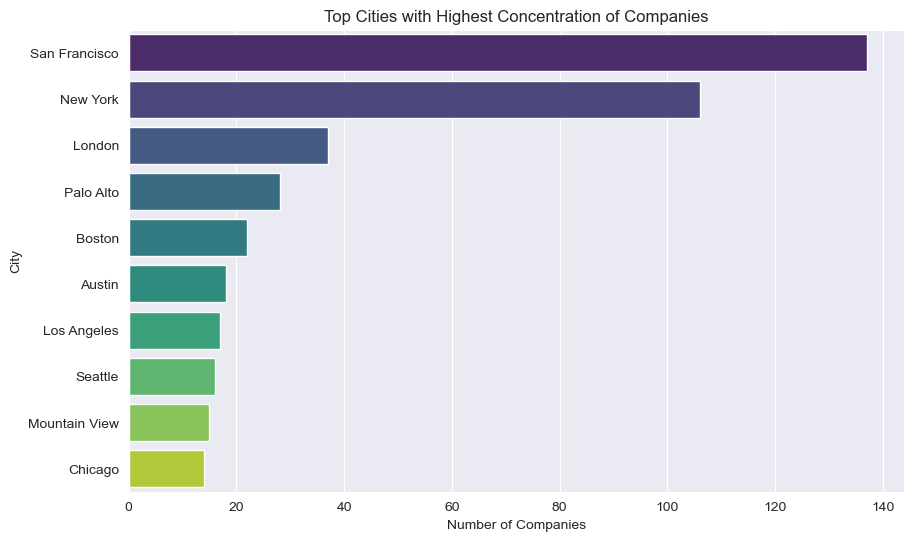

In [5]:
# Calculate the top cities by company count
top_cities = city_distribution.head(10)

# Set up plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')

# Add labels and title
plt.xlabel('Number of Companies')
plt.ylabel('City')
plt.title('Top Cities with Highest Concentration of Companies')

# Show the plot
plt.show()

In [11]:
# Calculate the average growth percentages for different locations
companies_data['growth_percentage'] = companies_data['growth_percentage'].str.rstrip('%').astype(float)
average_growth_by_city = companies_data.groupby('city')['growth_percentage'].mean()
average_growth_by_state = companies_data.groupby('state')['growth_percentage'].mean()
average_growth_by_country = companies_data.groupby('country')['growth_percentage'].mean()

# Display the average growth percentages for different locations
print("Average Growth Percentages by City:", average_growth_by_city)
print("\nAverage Growth Percentages by State:", average_growth_by_state)
print("\nAverage Growth Percentages by Country:", average_growth_by_country)

Average Growth Percentages by City: city
Abu Dhabi         100.0
Agoura Hills        2.0
Alameda            11.0
Albany            132.0
Alexandria         15.0
                  ...  
Worcester         131.0
Yehud               5.0
Yosemite Lakes      7.0
Zurich             24.0
Ä°stanbul         347.0
Name: growth_percentage, Length: 336, dtype: float64

Average Growth Percentages by State: state
AB                    23.000000
AR                   232.500000
AZ                   119.363636
Agder                427.000000
BC                    57.833333
CA                    74.492401
CO                    47.400000
CT                    18.500000
Ca                    73.000000
DC                    75.142857
DE                   697.000000
FL                    87.531250
GA                   118.916667
IL                    67.888889
IN                    21.666667
KS                    21.500000
KY                    46.000000
LA                    22.500000
MA                    

In [13]:
def get_top_10(average_growth):
    top_10 = average_growth.nlargest(10)
    return top_10

top_10_average_growth_by_city = get_top_10(average_growth_by_city)
top_10_average_growth_by_state = get_top_10(average_growth_by_state)
top_10_average_growth_by_country = get_top_10(average_growth_by_country)

# Display the average growth percentages for different locations
print("Top 10 Average Growth by City:", top_10_average_growth_by_city)
print("\nTop 10 Average Growth by State:", top_10_average_growth_by_state)
print("\nTop 10 Average Growth by Country:", top_10_average_growth_by_country)

Top 10 Average Growth by City: city
Bromsgrove                861.0
Irving                    751.0
Dyersburg                 734.0
North Richland Hills      733.0
Puri                      732.0
Frankfurt am Main         708.0
Dover                     697.0
Franklin Lakes            681.0
Serilingampally Mandal    660.0
Santa Catarina            652.0
Name: growth_percentage, dtype: float64

Top 10 Average Growth by State: state
DE                   697.0
Maharastra           633.0
Western Australia    599.0
Madhya Pradesh       574.0
New South Wales      507.0
UTTARPRADESH         484.0
Telangana            443.0
Agder                427.0
Maharashtra          407.0
NH                   341.0
Name: growth_percentage, dtype: float64

Top 10 Average Growth by Country: country
Taiwan         468.00
Kuwait         444.00
Namibia        386.00
Spain          375.50
Turkey         347.00
Denmark        339.00
Brazil         334.00
Romania        331.00
New Zealand    314.00
Netherlands   

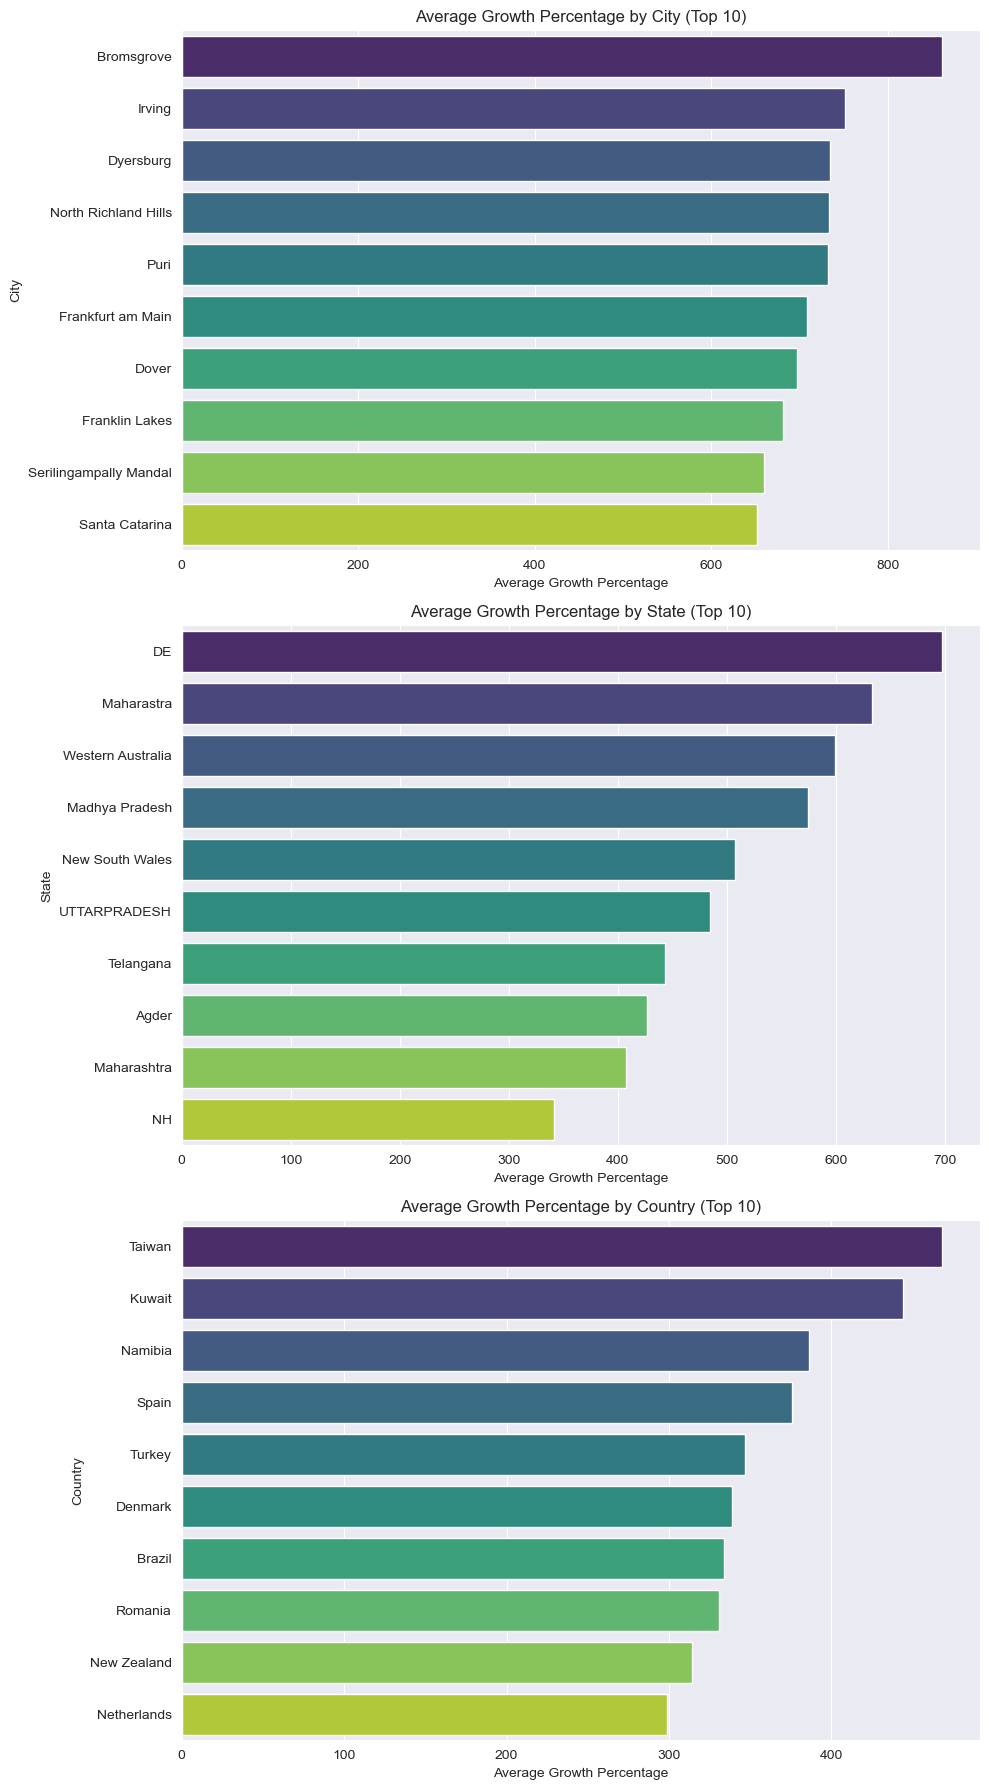

In [14]:
# Set up subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Visualize average growth percentages by city
sns.barplot(x=top_10_average_growth_by_city.values, y=top_10_average_growth_by_city.index, ax=axes[0], palette='viridis')
axes[0].set_xlabel('Average Growth Percentage')
axes[0].set_ylabel('City')
axes[0].set_title('Average Growth Percentage by City (Top 10)')

# Visualize average growth percentages by state
sns.barplot(x=top_10_average_growth_by_state.values, y=top_10_average_growth_by_state.index, ax=axes[1], palette='viridis')
axes[1].set_xlabel('Average Growth Percentage')
axes[1].set_ylabel('State')
axes[1].set_title('Average Growth Percentage by State (Top 10)')

# Visualize average growth percentages by country
sns.barplot(x=top_10_average_growth_by_country.values, y=top_10_average_growth_by_country.index, ax=axes[2], palette='viridis')
axes[2].set_xlabel('Average Growth Percentage')
axes[2].set_ylabel('Country')
axes[2].set_title('Average Growth Percentage by Country (Top 10)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [19]:
# Group the data by region (city, state, country) and industry, then calculate counts
industry_distribution_by_region = companies_data.groupby(['city', 'state', 'country', 'Industry']).size().reset_index(name='Company Count')
industry_distribution_by_region

,city,state,country,Industry,Company Count
0,Abu Dhabi,Unknown,United Arab Emirates,AI,1
1,Agoura Hills,CA,United States,Recruiting,1
2,Alameda,CA,United States,Electronics,1
3,Albany,OR,United States,Engineering,1
4,Alexandria,VA,United States,Fintech,1
...,...,...,...,...,...
707,Yehud,Unknown,Israel,3D,1
708,Yosemite Lakes,CA,United States,Casinos,1
709,Zurich,Unknown,Switzerland,Fintech,1
710,Zurich,Unknown,Switzerland,Hardware,1


In [20]:
# Calculate the top 10 locations by company count
top_locations = companies_data['city'].value_counts().head(10).index

# Filter the dataset to include only the top 10 locations
top_locations_df = companies_data[companies_data['city'].isin(top_locations)]

In [21]:
# Calculate the distribution of industries for each top location
industry_distribution_by_location = top_locations_df.groupby(['city', 'Industry'])['company_name'].count().unstack()
industry_distribution_by_region

,city,state,country,Industry,Company Count
0,Abu Dhabi,Unknown,United Arab Emirates,AI,1
1,Agoura Hills,CA,United States,Recruiting,1
2,Alameda,CA,United States,Electronics,1
3,Albany,OR,United States,Engineering,1
4,Alexandria,VA,United States,Fintech,1
...,...,...,...,...,...
707,Yehud,Unknown,Israel,3D,1
708,Yosemite Lakes,CA,United States,Casinos,1
709,Zurich,Unknown,Switzerland,Fintech,1
710,Zurich,Unknown,Switzerland,Hardware,1


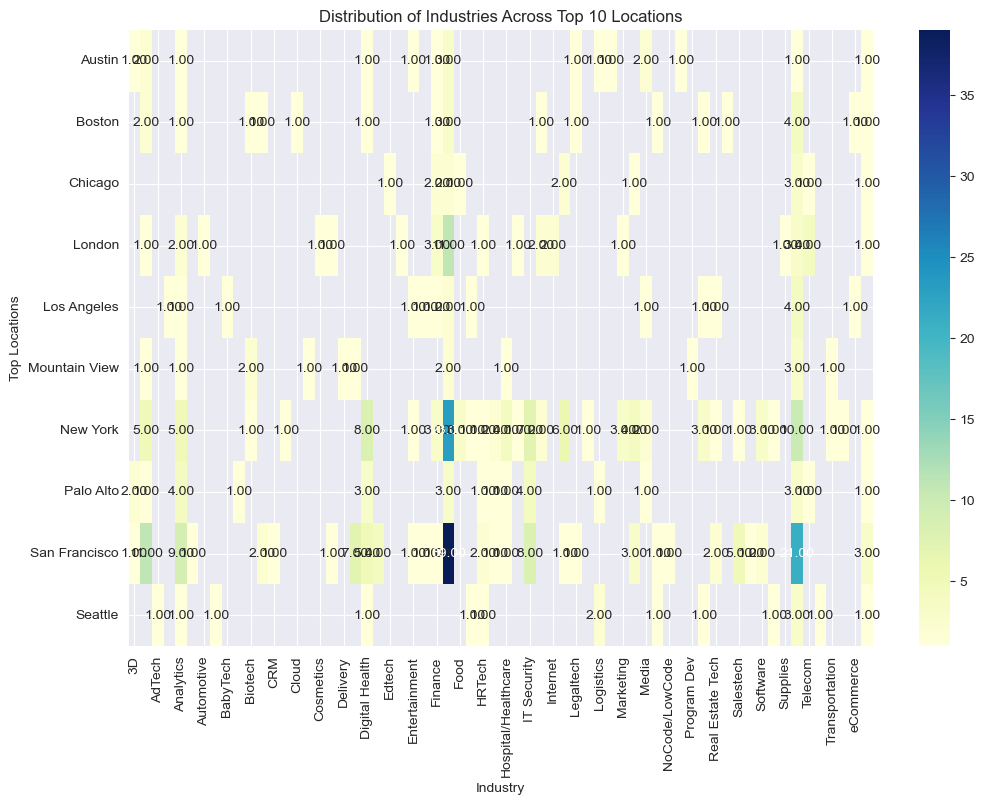

In [23]:
# Set up plot
plt.figure(figsize=(12, 8))
sns.heatmap(industry_distribution_by_location, cmap='YlGnBu', annot=True, fmt='.2f')

# Add labels and title
plt.xlabel('Industry')
plt.ylabel('Top Locations')
plt.title('Distribution of Industries Across Top 10 Locations')

# Show the plot
plt.show()